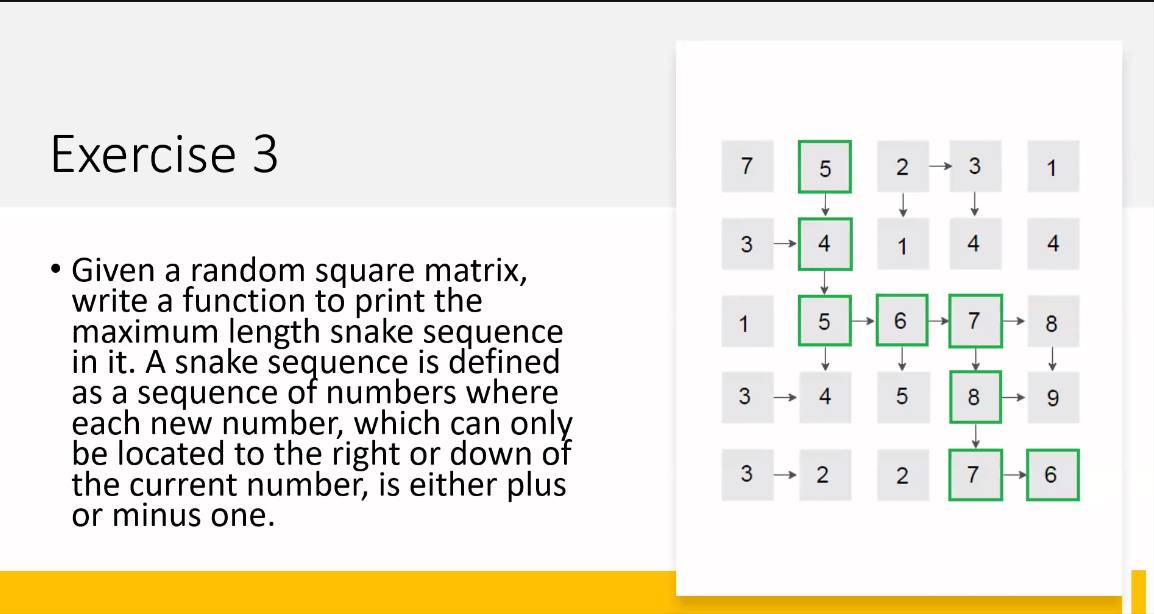

In [ ]:
"""
       5
     4
   5
 4  6
   5  7
     8  8
    7  9   9
      6 
"""
"""
      2
   1    3
      4
"""


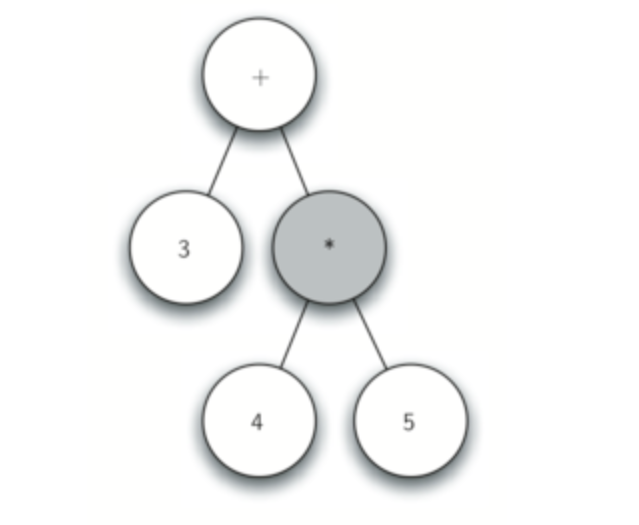

In [1]:
matrix = [[7, 5, 2, 3, 1],
          [3, 4, 1, 4, 4],
          [1, 5, 6, 7, 8],
          [3, 4, 5, 8, 9],
          [3, 2, 2, 7, 6]]

In [11]:
class BinaryTree:
    def __init__(self, value):
        self.value = value
        self.leftChild = None
        self.rightChild = None
    
    def addLeftChild(self, value):
        if self.leftChild is None:
            self.leftChild = BinaryTree(value)
            return
        
        # new node to insert
        node = BinaryTree(value)
        
        # copy subtree
        temp = self.leftChild
        # new node was inserted
        self.leftChild = node
        # link subtree to new inserted node
        node.leftChild = temp
    
    def addRightChild(self, value):
        if self.rightChild is None:
            self.rightChild = BinaryTree(value)
            return
        
        node = BinaryTree(value)
        
        temp = self.rightChild
        self.rightChild = node
        node.rightChild = temp
    
    def __repr__(self):
        return str(self.value)

In [12]:
root = BinaryTree(1)

root.addLeftChild(2)
root.addRightChild(3)

root.leftChild.addLeftChild(5)

In [31]:
# root.addLeftChild(4)
# root.leftChild.leftChild.addRightChild(7)

In [ ]:
"""
     1
   2   3
 5
    
      1
    4   3
  2
5  7
"""

In [62]:
def printTree(tree, level = 0):
    if tree:
        print(" " * level * 2, tree)
        printTree(tree.leftChild, level + 1)
        printTree(tree.rightChild, level + 1)
        
printTree(root)

 1
   4
     2
       5
       7
   3


In [ ]:
# print(root) root -> 1
# print(root.leftChild) root.leftChild -> 4
# print(root.leftChild.leftChild) root.leftChild.leftChild -> 2
# print(root.leftChild.leftChild.leftChild) root.leftChild.leftChild.leftChild -> 5
# print(root.leftChild.leftChild.leftChild.leftChild) root.leftChild.leftChild.leftChild.leftChild -> None
# if tree == None -> False 
# printTree(root.rightChild)  root.rightChild -> 3

In [ ]:
"""
  1
2   3
"""

In [50]:
def printTree(tree):
    children = [tree]
    levels = [0]
    while len(children) > 0:
        node = children.pop()
        level = levels.pop() 
        print(" " * level * 2, node)
           
        if node.rightChild:
            rightChild = node.rightChild
            children.append(rightChild)
            levels.append(level + 1)
        
        if node.leftChild:
            leftChild = node.leftChild
            children.append(leftChild)
            levels.append(level + 1)

printTree(root)

 1
   4
     2
       5
       7
   3


In [ ]:
# [tree] -> 1
# [rightChild, leftChild] -> leftChild -> 2
# [rightChild] -> rightChild -> 3

In [ ]:
# 1
#   4
#     2
#       5
#       7
#   3

In [63]:
def printTree(tree, level = 0):
    if tree:
        printTree(tree.leftChild, level + 1)
        print(" " * 4 * level + '-> ' + str(tree.value))
        printTree(tree.rightChild, level + 1)

printTree(root)

            -> 5
        -> 2
            -> 7
    -> 4
-> 1
    -> 3


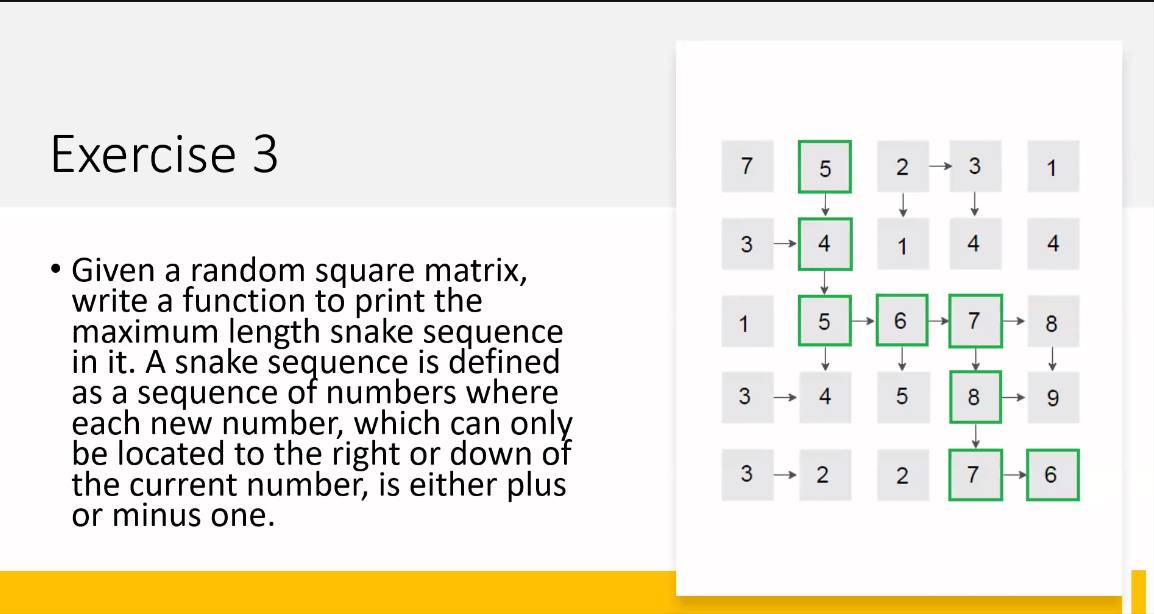

In [81]:
# bottom - leftChild
# right - rightChild

# basic - далі немає куди рухатись 
# recursive - якщо можемо просуватися вглиб

i = 3
j = 0

nrow = ncol = len(matrix) - 1

if j == ncol:
    print("YOU ARE IN LAST COLUMN")
    
if i == nrow:
    print("YOU ARE IN LAST ROW")

current_element = matrix[i][j]
bottom_element = matrix[i+1][j]
right_element = matrix[i][j+1]

if abs(current_element - bottom_element) == 1:
    print("YES BOTTOM")

if abs(current_element - right_element) == 1:
    print("YES RIGHT")

YES RIGHT


In [77]:
def has_path(current_element, neighbour_element):
    return abs(current_element - neighbour_element) == 1

In [83]:
has_path(current_element, bottom_element)

False

In [168]:
def snake_path(matrix, i, j, root):
    nrow = ncol = len(matrix) - 1
    
    bottom_element = right_element = None
    
    # bottom row border
    if i != nrow:
        bottom_element = matrix[i+1][j]
    
    # right column border
    if j != ncol:
        right_element = matrix[i][j+1]
        
        
    if bottom_element:
        if has_path(root.value, bottom_element):
            root.leftChild = BinaryTree(bottom_element)
            snake_path(matrix, i+1, j, root.leftChild)
    
    if right_element:
        if has_path(root.value, right_element):
            root.rightChild = BinaryTree(right_element)
            snake_path(matrix, i, j+1, root.rightChild)
    
    return root

In [169]:
snake_tree = snake_path(matrix, 0, 2, root = BinaryTree(matrix[0][2]))

In [170]:
printTree(snake_tree)

    -> 1
-> 2
        -> 4
    -> 3


In [ ]:
# TASK! Знайти максимальну висоту дерева (для приклада вище - висота дорівнює 3)
# для приклада коли i = 0 j =1 - висота дорівнює 8 